In [43]:
import pandas as pd

# Load the data
train = pd.read_csv("input/customer_churn_dataset-training-master.csv")
test = pd.read_csv("input/customer_churn_dataset-testing-master.csv")
train.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [44]:
# remove id and categorical features
train = train.drop(['CustomerID', 'Gender', 'Subscription Type', 'Contract Length'], axis=1)
train.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0
1,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0
2,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0
3,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0
4,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0


In [45]:
test = test.drop(['CustomerID', 'Gender', 'Subscription Type', 'Contract Length'], axis=1)
test.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,22,25,14,4,27,598,9,1
1,41,28,28,7,13,584,20,0
2,47,27,10,2,29,757,21,0
3,35,9,12,5,17,232,18,0
4,53,58,24,9,2,533,18,0


In [46]:
# check for missing values
train.isnull().sum()

Age                 1
Tenure              1
Usage Frequency     1
Support Calls       1
Payment Delay       1
Total Spend         1
Last Interaction    1
Churn               1
dtype: int64

In [47]:
# remove missing values
train = train.dropna()
train.isnull().sum()

Age                 0
Tenure              0
Usage Frequency     0
Support Calls       0
Payment Delay       0
Total Spend         0
Last Interaction    0
Churn               0
dtype: int64

In [48]:
# check for missing values
test.isnull().sum()

Age                 0
Tenure              0
Usage Frequency     0
Support Calls       0
Payment Delay       0
Total Spend         0
Last Interaction    0
Churn               0
dtype: int64

In [49]:
# shuffle the training data
train = train.sample(frac=1).reset_index(drop=True)
train.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,32.0,14.0,19.0,0.0,8.0,727.16,15.0,0.0
1,30.0,11.0,9.0,6.0,17.0,694.00,28.0,1.0
2,39.0,59.0,23.0,3.0,6.0,570.22,14.0,0.0
3,22.0,26.0,11.0,2.0,24.0,400.00,3.0,1.0
4,39.0,48.0,17.0,8.0,10.0,214.00,9.0,1.0


In [50]:
# Prepare train and test data
X_train = train.drop(['Churn'], axis=1)
y_train = train['Churn']

X_test = test.drop(['Churn'], axis=1)
y_test = test['Churn']

In [51]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.59258503, -1.00003639,  0.37181694, ..., -0.60131868,
         0.39677199,  0.06039089],
       [-0.7533263 , -1.17389191, -0.79283831, ...,  0.48852657,
         0.25906591,  1.57268738],
       [-0.02999058,  1.60779636,  0.83767903, ..., -0.84350652,
        -0.25496481, -0.05593961],
       ...,
       [ 0.37186259,  1.37598901,  0.72121351, ..., -0.48022477,
         1.00340963, -0.75392261],
       [-0.43184376, -0.76822903, -1.14223488, ..., -0.60131868,
         1.27649624, -0.87025311],
       [ 0.6129745 ,  0.68056694, -0.55990726, ..., -0.7224126 ,
         1.04738754,  1.10736538]])

In [52]:
# Perform PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X_train_scaled)
X_train_pc = pca.transform(X_train_scaled)
X_test_pc = pca.transform(X_test_scaled)
X_train_pc

array([[-1.30375054, -0.97362053,  0.26809752],
       [ 0.76625999, -0.24664998,  1.33407848],
       [-0.56074903,  0.51882261,  0.3518543 ],
       ...,
       [-0.83944989,  0.41851696, -0.45534815],
       [-1.63492866,  0.2566242 , -0.80670149],
       [-1.06346231,  0.83016965,  1.04178433]])

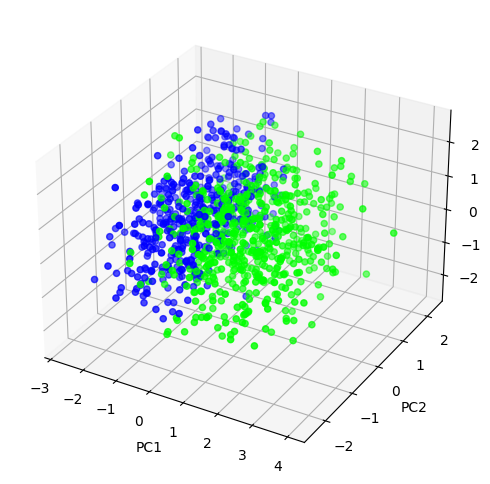

In [53]:
# Plot the data in 3D
import matplotlib.pyplot as plt

nr_samples = 1000
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_pc[:nr_samples, 0], X_train_pc[:nr_samples, 1], X_train_pc[:nr_samples, 2], c=y_train[:nr_samples],
           cmap='brg')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [54]:
# Train a logistic regression model with 3 principal components
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_pc, y_train)

# Evaluate the model
print("Train accuracy:", logreg.score(X_train_pc, y_train))
print("Test accuracy:", logreg.score(X_test_pc, y_test))

Train accuracy: 0.8290618648373984
Test accuracy: 0.5885761332214869


In [55]:
# Train a logistic regression model with all features
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Evaluate the model
print("Train accuracy:", logreg.score(X_train_scaled, y_train))
print("Test accuracy:", logreg.score(X_test_scaled, y_test))

Train accuracy: 0.8440970709930313
Test accuracy: 0.5864324106005531
